### DATA WAREHOUSING, ANALYSIS, AND VISUALIZATION FOR BUSINESS INSIGHTS

#### Project Akhir 

Dimas Trio Roysaputra


### 1. Build a google data studio dashboard that could answer these questions:


* How many transactions are labeled Fraud?
* What % of transactions are labeled Fraud?
* What’s the name of the top merchants?
* What’s the average amount of transactions Amount?
* What’s the average amount of transactions on Fraudulent Transactions?
* What’s the average amount of transactions on Legitimate Transactions? 
* What’s the earliest account open date regarding the dataset?
* What’s the most recent account open date regarding the dataset?
* What’s the top transaction type?

*You can also add more exploratory data analysis and graphs to support your findings, and you can also add insights/key takeaways under the specific visualizations*

https://datastudio.google.com/s/t4JUECT1YN4

### 2. Using techniques you already learn, what’s the most significant factor affecting the target label (translation is fraud or legitimate)? You can also use machine learning algorithms to show the relations/significance of the independent variables to the target variable

# Learning and Understand about the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_json("/content/drive/MyDrive/transactions.json", lines=True)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,...,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,...,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,...,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,...,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,...,False,,550.82,,,,False,,,False


In [ ]:
df.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
isFraud                        bool
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd            

In [ ]:
df.isnull().any()

accountNumber               False
customerId                  False
creditLimit                 False
availableMoney              False
transactionDateTime         False
transactionAmount           False
merchantName                False
acqCountry                  False
merchantCountryCode         False
posEntryMode                False
posConditionCode            False
merchantCategoryCode        False
currentExpDate              False
accountOpenDate             False
dateOfLastAddressChange     False
cardCVV                     False
enteredCVV                  False
cardLast4Digits             False
transactionType             False
isFraud                     False
echoBuffer                  False
currentBalance              False
merchantCity                False
merchantState               False
merchantZip                 False
cardPresent                 False
posOnPremises               False
recurringAuthInd            False
expirationDateKeyInMatch    False
dtype: bool

In [ ]:
df.eq('').sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInM

In [ ]:
df.shape

(641914, 29)

In [ ]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'isFraud', 'echoBuffer', 'currentBalance',
       'merchantCity', 'merchantState', 'merchantZip', 'cardPresent',
       'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch'],
      dtype='object')

Convert dtypes kolom dataframe integer dari object ke int

In [ ]:
def hasNumbers(inputString):
        return any(char.isdigit() for char in inputString)

for col in df.columns: 
    if(df[col].dtype == object and hasNumbers(df[col]) == True):
        df[col] = pd.to_numeric(df[col])
df = df.dropna()

In [ ]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'], errors='coerce')
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'], errors='coerce')
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], errors='coerce')
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], errors='coerce')

In [ ]:
df.dtypes

accountNumber                        int64
customerId                           int64
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                       float64
posConditionCode                   float64
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                              int64
enteredCVV                           int64
cardLast4Digits                      int64
transactionType                     object
isFraud                               bool
echoBuffer                          object
currentBalance                     float64
merchantCity                        object
merchantSta

Data types sudah terubah

# Handling Missing Values

Drop kolom dan data yang tidak punya value atau kosong / null

In [ ]:
df.drop(['echoBuffer','merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd', 'recurringAuthInd'], axis=1, inplace=True)
for col in df.columns:
    if (df[col].eq('').any() == True):
        df.drop(df[df[col].eq('')].index, inplace = True)

# Exploratory Data Analysis

In [ ]:
df_fraud=df[df['isFraud']==True]
df_fraud

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False
73,733493772,733493772,5000,2730.06,2016-06-07 22:40:50,78.92,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,2269.94,False,False
80,733493772,733493772,5000,2394.36,2016-06-16 06:43:35,665.84,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,2605.64,False,False
85,733493772,733493772,5000,910.91,2016-06-26 06:14:02,665.84,Lyft,US,US,2.0,...,2014-08-03,2014-08-03,492,492,9184,REVERSAL,True,4089.09,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641627,877651598,877651598,7500,5802.15,2016-11-26 09:23:07,44.27,target.com,US,US,5.0,...,2012-01-07,2012-01-07,547,547,3593,PURCHASE,True,1697.85,False,False
641792,455115932,455115932,50000,34545.80,2016-09-12 00:18:28,12.71,Blue Mountain Online Services,US,US,5.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,True,15454.20,False,False
641812,455115932,455115932,50000,33255.25,2016-10-17 04:27:42,695.87,Fresh Flowers,US,US,9.0,...,2011-02-02,2011-02-02,148,148,2521,PURCHASE,True,16744.75,False,False
641870,186770399,186770399,7500,6448.10,2016-05-19 08:55:28,92.60,Blue Mountain Online Services,US,US,2.0,...,2015-11-04,2015-11-04,127,127,5432,PURCHASE,True,1051.90,False,False


Coba cari tahu berapa value dari target var isFraud, dan datanya imbalance.

In [ ]:
isFraud=df['isFraud'].value_counts().to_frame()
isFraud['%'] = isFraud/len(df)*100
isFraud

,isFraud,%
False,622954,98.281602
True,10892,1.718398


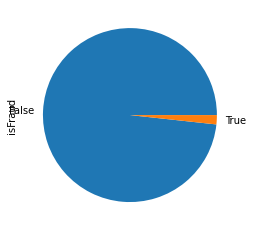

In [ ]:
isFraud['isFraud'].plot(kind='pie')

Coba cari tahu hubungan numerical features variable dengan target, apakah ada yang kira - kira mempengaruhi variable target.

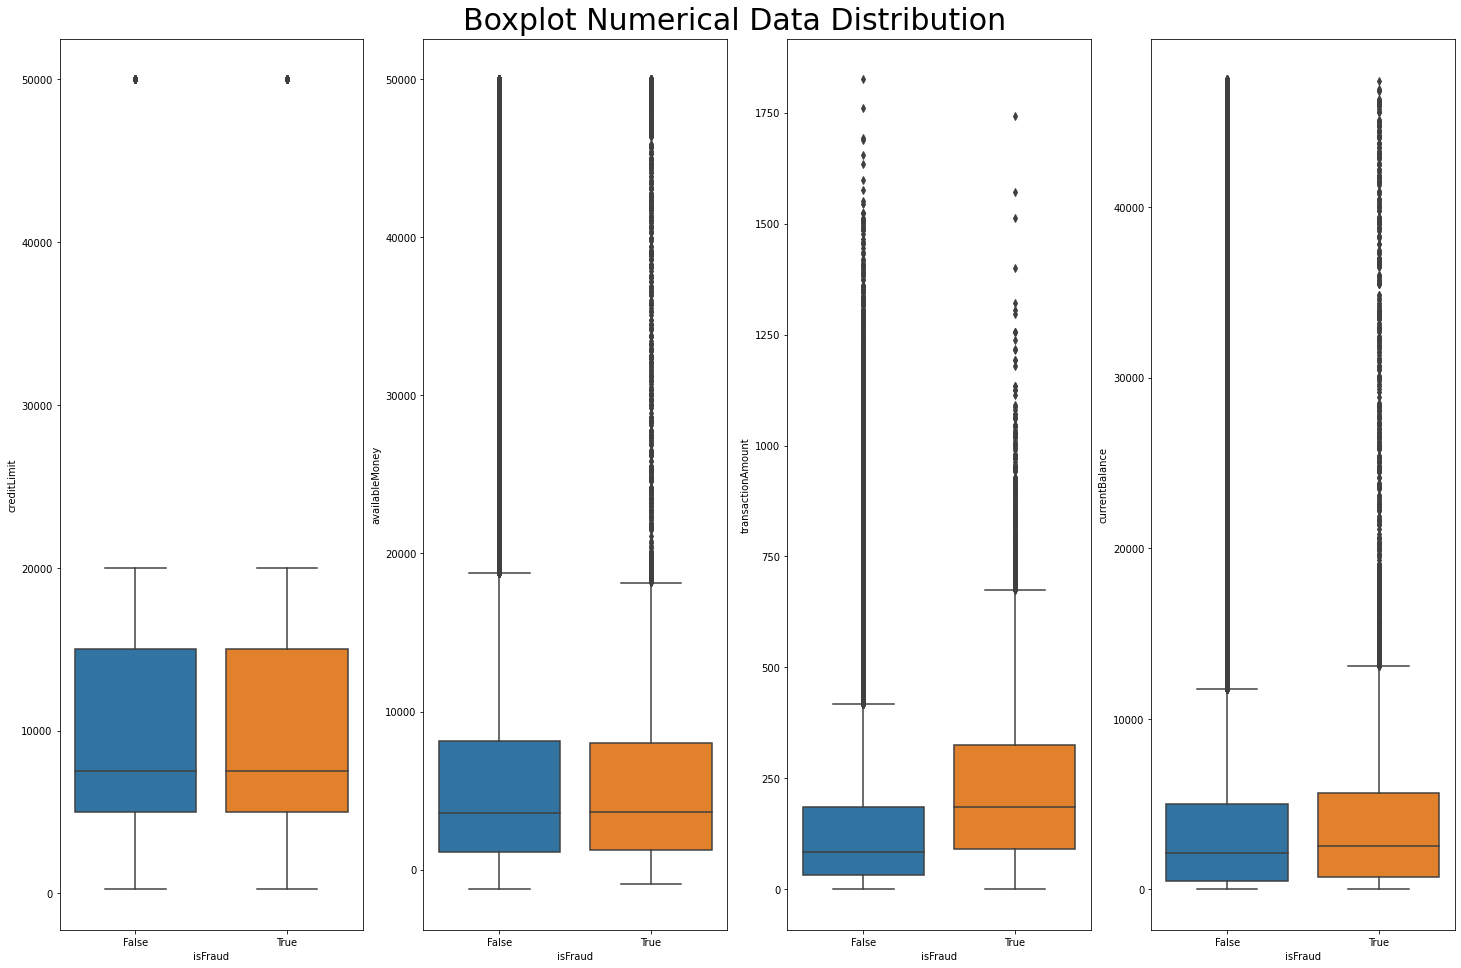

In [ ]:
numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
fig = plt.figure(figsize=(25,15))

for i in range(len(numeric_cols)):
    column = numeric_cols[i]
    sub = fig.add_subplot(1, 4, i + 1)
    sns.boxplot(data=df, x='isFraud', y=column, orient='v')

plt.suptitle('Boxplot Numerical Data Distribution', fontsize=30)
fig.subplots_adjust(top=0.95)

Sambil kita lihat Outliers yang ada pada numerical data, kita bisa lihat juga independent variable yang mungkin berpengaruh terhadap isFraud, yang paling menonjol dan terlihat adalah transactionAmount.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

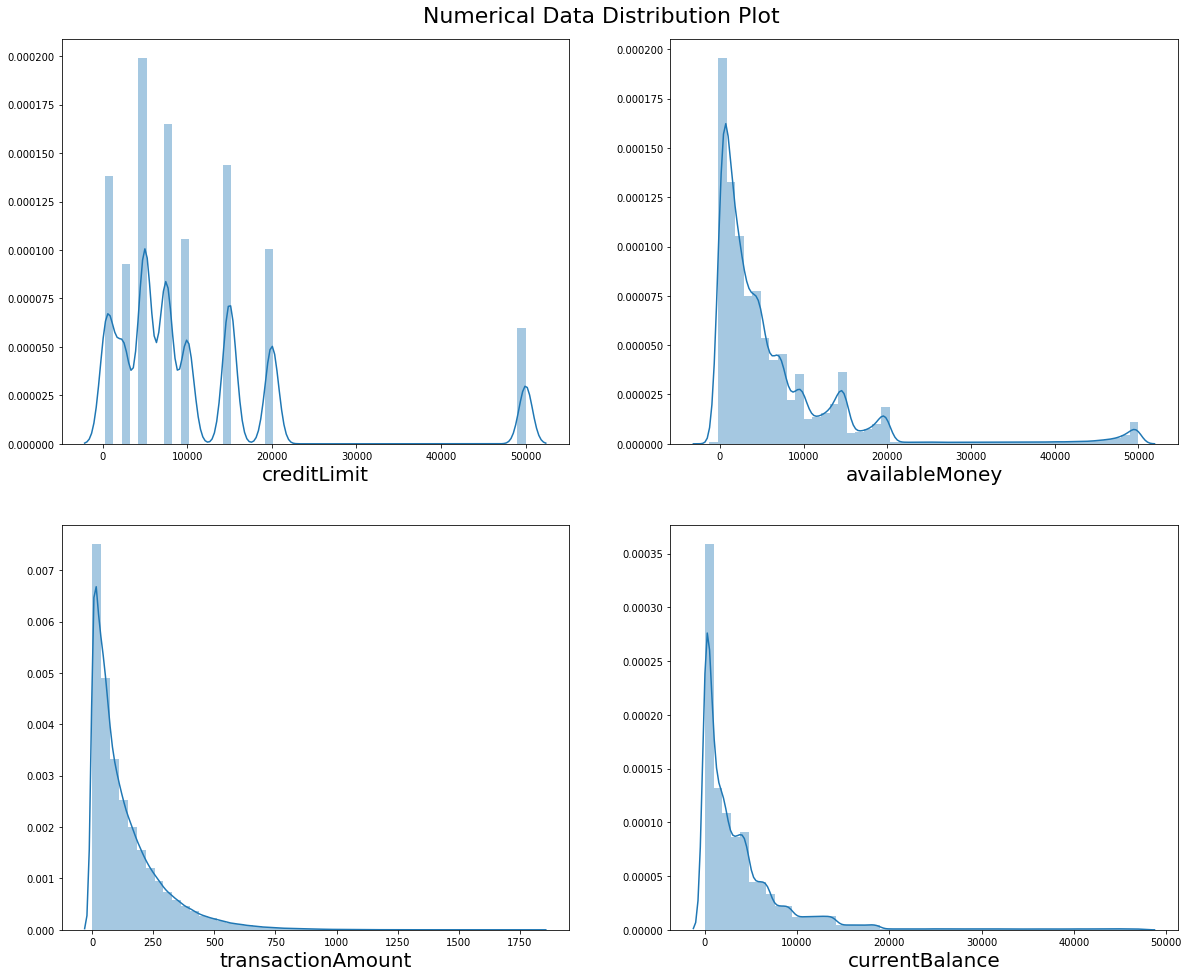

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
counter = 0

for i in range(2):
    for j in range(2):
        sns.distplot(df[numeric_cols[counter]], ax=ax[i][j])
        ax[i][j].set_xlabel(numeric_cols[counter], fontsize=20)
        ax[i][j].set_ylabel('')
        counter+=1

fig.suptitle('Numerical Data Distribution Plot', fontsize=22)
fig.subplots_adjust(top=0.95)

Data Distribusi dari Numerical Value

Coba cari tahu hubungan categorical features / independant variable dengan target, apakah ada yang kira - kira mempengaruhi variable target.

In [ ]:
merchantName=df['merchantName'].value_counts().to_frame()
merchantName['%']=merchantName/len(df)*100
merchantName

,merchantName,%
Lyft,24973,3.939916
Uber,24951,3.936445
gap.com,13649,2.153362
apple.com,13450,2.121967
target.com,13450,2.121967
...,...,...
EZ Wireless #640866,1,0.000158
Boost Mobile #745135,1,0.000158
Sprint Communications #485210,1,0.000158
Fast Mobile #685186,1,0.000158


In [ ]:
merchantCategoryCode=df['merchantCategoryCode'].value_counts().to_frame()
merchantCategoryCode['%']=merchantCategoryCode/len(df)*100
merchantCategoryCode

,merchantCategoryCode,%
online_retail,159509,25.165261
fastfood,99943,15.767710
entertainment,68254,10.768231
food,67426,10.637600
rideshare,49924,7.876361
online_gifts,32645,5.150305
hotels,22567,3.560329
fuel,22274,3.514103
subscriptions,18159,2.864891
personal care,16694,2.633763


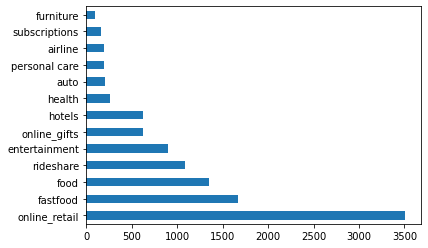

In [ ]:
df[df['isFraud']==True]['merchantCategoryCode'].value_counts().plot(kind='barh')

In [ ]:
acqCountry=df['acqCountry'].value_counts().to_frame()
acqCountry['%'] = acqCountry/len(df)*100
acqCountry

,acqCountry,%
US,628193,99.108143
MEX,2605,0.410983
CAN,1856,0.292816
PR,1192,0.188058


In [ ]:
merchantCountryCode=df['merchantCountryCode'].value_counts().to_frame()
merchantCountryCode['%'] = merchantCountryCode/len(df)*100
merchantCountryCode

,merchantCountryCode,%
US,628201,99.109405
MEX,2604,0.410825
CAN,1850,0.291869
PR,1191,0.187901


In [ ]:
posEntryMode=df['posEntryMode'].value_counts().to_frame()
posEntryMode

,posEntryMode
5.0,253748
9.0,191738
2.0,159430
90.0,16113
80.0,12817


Source : https://www.mreports.com/documentation/ac/nonmerchant/80451.htm

*   05 = Integrated circuit card read; card data reliable.
*   09 = PAN entry via electronic commerce, including chip.
*   02 = Magnetic stripe read. For Plus transactions, this code also means that the exact Track 2 content is included and CVV checking is possible.
*   90 = Magnetic stripe read and extract content of Track 1 or Track 2 included (CVV check is possible).
*   80 = Chip card was unable to process/magnetic stripe read default.

This two-digit code identifies the actual method used to enter the cardholder account number and card expiration date.

Text(0, 0.5, '# of Transations')

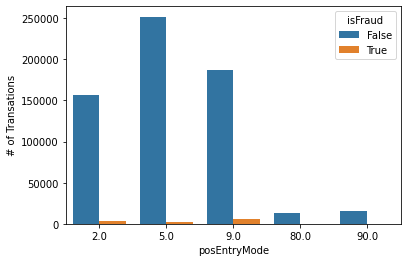

In [ ]:
sns.countplot(data=df, x='posEntryMode', hue='isFraud')
plt.xlabel('posEntryMode')
plt.ylabel('# of Transations')

In [ ]:
posConditionCode=df['posConditionCode'].value_counts().to_frame()
posConditionCode

,posConditionCode
1.0,507891
8.0,120035
99.0,5920


This field contains a code identifying transaction conditions at the point-of-sale or point-of-service. For messages that follow an original request, this code identifies the type of processing being done. 

Source = https://www.mreports.com/documentation/ac/nonmerchant/80449.htm

*   01 = Cardholder not present
*   08 = Mail/telephone order (includes Visa phone and reoccurring transactions)
*   99 = tidak diketahui



Text(0, 0.5, '# of Transations')

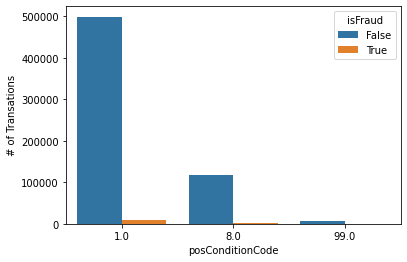

In [ ]:
sns.countplot(data=df, x='posConditionCode', hue='isFraud')
plt.xlabel('posConditionCode')
plt.ylabel('# of Transations')

In [ ]:
transactionType=df['transactionType'].value_counts().to_frame()
transactionType['%']=transactionType/len(df)*100
transactionType

,transactionType,%
PURCHASE,601556,94.905703
ADDRESS_VERIFICATION,16298,2.571287
REVERSAL,15992,2.523010


In [ ]:
df[df['isFraud']==True]['transactionType'].isnull().value_counts()

False    10892
Name: transactionType, dtype: int64

Kartu ada pada buyer saat melakukan transaksi

In [ ]:
cardPresent=df['cardPresent'].value_counts().to_frame()
cardPresent

,cardPresent
False,336201
True,297645


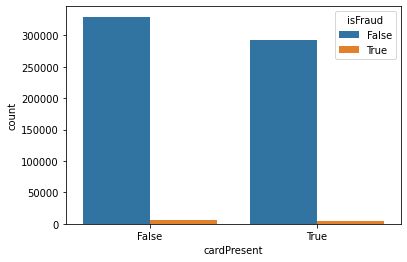

In [ ]:
sns.countplot(data=df, x='cardPresent', hue='isFraud')

# Data Preprocessing

Converting boolean values (isFraud, cardPresent, expirationDateKeyInMatch) ke binary

In [ ]:
for col in df.columns:
    if(df[col].astype(str).str.contains('True').sum()>0 and df[col].astype(str).str.contains('False').sum()>0):
        df.loc[df[col].astype(str).str.contains('True'), col] = 1
        df.loc[df[col].astype(str).str.contains('False'), col] = 0

Categorical Data Encoding dengan LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
obj_col = []
for col in df.columns: 
    if(df[col].dtype == object):
        obj_col.append(col)
           
labelencoder = LabelEncoder()
for i in obj_col:
    df[i] = labelencoder.fit_transform(df[i].astype(str))

Melihat korelasi independant variable dengan target

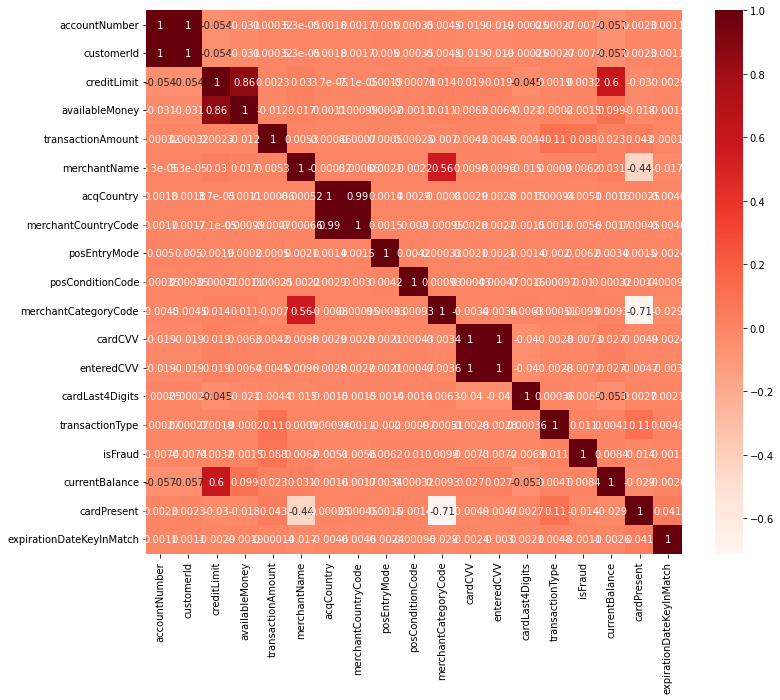

accountNumber               0.007447
customerId                  0.007447
creditLimit                 0.003165
availableMoney              0.001500
transactionAmount           0.087525
merchantName                0.006237
acqCountry                  0.005093
merchantCountryCode         0.005580
posEntryMode                0.006245
posConditionCode            0.010223
merchantCategoryCode        0.009946
cardCVV                     0.007306
enteredCVV                  0.007249
cardLast4Digits             0.006858
transactionType             0.010933
isFraud                     1.000000
currentBalance              0.008429
cardPresent                 0.014418
expirationDateKeyInMatch    0.001096
Name: isFraud, dtype: float64


In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor_target = abs(cor["isFraud"])
relevant_features = cor_target[cor_target>0]
print(relevant_features)

Drop features yang tidak relevant terhadap target variable atau model yang akan dibuat seperti customerId, accountNumber, merchantName, dll

In [ ]:
df['matchingCVV'] = df['cardCVV'] == df['enteredCVV']

for col in ['cardPresent', 'matchingCVV', 'expirationDateKeyInMatch', 'isFraud']:
    df[col] = df[col].replace({False: 0, True: 1})
account_number = df['accountNumber']
df.drop(['transactionDateTime',
         'cardLast4Digits',
         'merchantName',
         'accountOpenDate',
         'transactionDateTime',
         'currentExpDate',
         'customerId',
         'dateOfLastAddressChange',
         'accountNumber',
         'enteredCVV',
         'cardCVV',
         ], inplace=True, axis=1)

# Train / Test Split Dataset and Sampling Data using RandomUnderSampling

In [ ]:
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, auc, recall_score, precision_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

Sampling Imbalance Dataset

In [ ]:
# samp = SMOTE()
samp = RandomUnderSampler()
x = df.drop('isFraud', axis=1)
y = df['isFraud']
train_x, train_y = samp.fit_resample(x, y)
print(f'Original Data : {x.shape}')
print(f'Sampling Data: {train_x.shape}')

Original Data : (633846, 13)
Sampling Data: (21784, 13)


In [ ]:
train_features, test_features, train_target, test_target = train_test_split(train_x, train_y,test_size = 0.3, random_state = 42)

In [ ]:
(train_features.shape, train_target.shape, test_features.shape,test_target.shape)

((15248, 13), (15248,), (6536, 13), (6536,))

# Model Building

Buat definition untuk plot roc dan confusion matrix

In [ ]:
def plot_confusion(y_pred, y_true):
    conf = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print()
    print(f'Accuracy: {acc}')
    sns.heatmap(conf,
                cmap='Blues',
                cbar=False,
                annot=True,
                fmt='g',
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'],
                annot_kws={"size": 20}
                )
    plt.show()

def plot_roc(models):
    for key, value in models.items():
        fpr, tpr, _ = roc_curve(value[0], value[1])
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = '%25s AUC = %0.3f' % (key, roc_auc))
    
    ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
    ax.lines[len(models)].set_linestyle("--")
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')

## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 200, random_state=42)
rf.fit(train_features, train_target)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
pred = rf.predict(test_features)
print(classification_report(test_target, pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3276
           1       0.66      0.68      0.67      3260

    accuracy                           0.67      6536
   macro avg       0.67      0.67      0.67      6536
weighted avg       0.67      0.67      0.67      6536




Accuracy: 0.6699816401468788


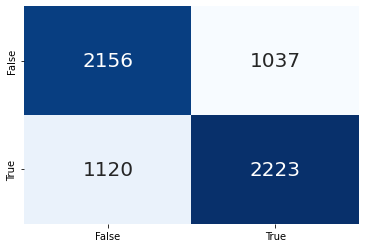

In [ ]:
y_pred = rf.predict(test_features)
y_pred_prob = rf.predict_proba(test_features)[:,1]
rand_f = [test_target, y_pred_prob]
plot_confusion(test_target, pred)

In [ ]:
importance = pd.Series(rf.feature_importances_ * 100, index = x.columns).sort_values(axis=0, ascending=False)
importance

transactionAmount           30.667939
availableMoney              20.537578
currentBalance              20.408531
merchantCategoryCode         9.065030
posEntryMode                 7.389586
creditLimit                  6.364444
posConditionCode             2.172252
cardPresent                  1.322991
transactionType              1.043415
matchingCVV                  0.449947
merchantCountryCode          0.270378
acqCountry                   0.248380
expirationDateKeyInMatch     0.059527
dtype: float64

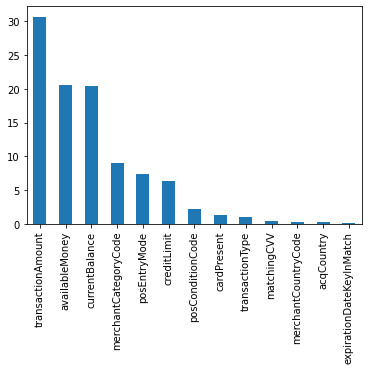

In [ ]:
importance.plot.bar(x='Independent Variable', y='Importance')

## XGBoost

In [ ]:
XGB = XGBClassifier().fit(train_features,train_target)  

In [ ]:
XGboost = XGB.predict(test_features)
print(classification_report(test_target, XGboost))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      3276
           1       0.68      0.69      0.68      3260

    accuracy                           0.68      6536
   macro avg       0.68      0.68      0.68      6536
weighted avg       0.68      0.68      0.68      6536




Accuracy: 0.680079559363525


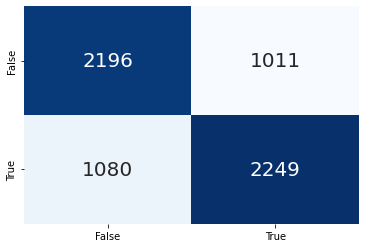

In [ ]:
ypred = XGB.predict(test_features)
ypred_prob = XGB.predict_proba(test_features)[:,1]
xgb = [test_target, ypred_prob]
plot_confusion(test_target,ypred)

In [ ]:
f = pd.Series(XGB.get_booster().get_score(importance_type='weight')).sort_values(axis=0, ascending=False)
importancexgb = f / f.sum() * 100
importancexgb

merchantCategoryCode    23.054332
transactionAmount       21.292217
posEntryMode            14.243759
availableMoney          12.187959
currentBalance           9.985316
creditLimit              7.635830
posConditionCode         5.580029
cardPresent              2.202643
matchingCVV              1.615272
merchantCountryCode      1.321586
transactionType          0.440529
acqCountry               0.440529
dtype: float64

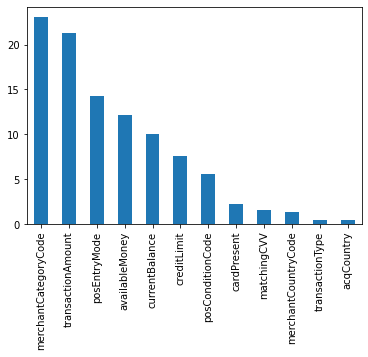

In [ ]:
importancexgb.plot.bar(x='Independent Variable', y='Importance')

## Logistic Regression Classifier

In [ ]:
lr = LogisticRegression()
lr.fit(train_features, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
lrpred = lr.predict(test_features)
print(classification_report(test_target, lrpred))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      3276
           1       0.66      0.55      0.60      3260

    accuracy                           0.63      6536
   macro avg       0.64      0.63      0.63      6536
weighted avg       0.64      0.63      0.63      6536




Accuracy: 0.633108935128519


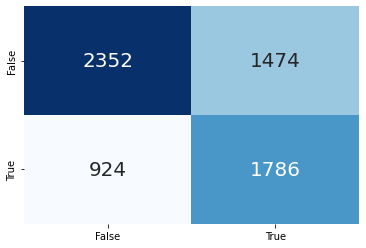

In [ ]:
y_lrpred = lr.predict(test_features)
y_lrpred_prob = lr.predict_proba(test_features)[:,1]
lr_f = [test_target, y_lrpred_prob]
plot_confusion(test_target, lrpred)

In [ ]:
imptance = lr.coef_[0]
imptance=np.sort(imptance)
for i,v in enumerate(imptance):
	print('Independent Variable: %0d, Importance Score: %.5f' % (i,v))

Independent Variable: 0, Importance Score: -0.09070
Independent Variable: 1, Importance Score: -0.09052
Independent Variable: 2, Importance Score: -0.03814
Independent Variable: 3, Importance Score: -0.03134
Independent Variable: 4, Importance Score: -0.02573
Independent Variable: 5, Importance Score: -0.00037
Independent Variable: 6, Importance Score: -0.00001
Independent Variable: 7, Importance Score: -0.00000
Independent Variable: 8, Importance Score: 0.00001
Independent Variable: 9, Importance Score: 0.00134
Independent Variable: 10, Importance Score: 0.00185
Independent Variable: 11, Importance Score: 0.00344
Independent Variable: 12, Importance Score: 0.01618


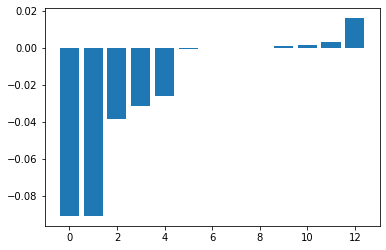

In [ ]:
plt.bar([i for i in range (len(imptance))],imptance)
plt.show()

# Model Combine Evaluation using ROC AUC

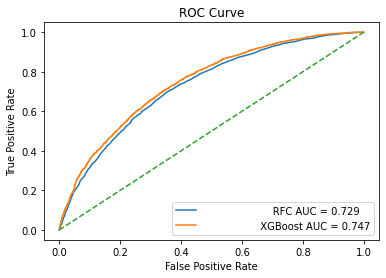

In [ ]:
hasil_models = {'RFC': rand_f,'XGBoost': xgb}
plot_roc(hasil_models)